In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

In [39]:
disposableincome_path = 'data/disposableincome.csv'
divorces_path = 'data/divorces.csv' 
grossregionalproduct_path = 'data/grossregionalproduct.csv'
marriages_path = 'data/marriages.csv'

#education files paths
higher_education_path = 'data/education_students_higer_education_per100000.csv'
senior_secondary_education_path = 'data/education_students_senior_secondary_per100000.csv'
junior_secondary_education_path = 'data/education_students_junior_secondary_per100000.csv'
primary_education_path = 'data/education_students_primary_per100000.csv'
kindergarten_education_path = 'data/education_students_kindergarten_per100000.csv'

In [40]:
disposableincome_df = pd.read_csv(disposableincome_path, skiprows=3, skipfooter=1, engine='python')
divorces_df = pd.read_csv(divorces_path, skiprows=3, skipfooter=1, engine='python')
grossregionalproduct_df = pd.read_csv(grossregionalproduct_path, skiprows=3, skipfooter=1, engine='python')
marriages_df = pd.read_csv(marriages_path, skiprows=3, skipfooter=1, engine='python')

# education dataframes
higher_edu_df = pd.read_csv(highereducation_path, skiprows=3, skipfooter=1, engine='python')
senior_sec_edu_df = pd.read_csv(senior_secondary_education_path, skiprows=3, skipfooter=1, engine='python')
junior_sec_edu_df = pd.read_csv(junior_secondary_education_path, skiprows=3, skipfooter=1, engine='python')
primary_edu_df = pd.read_csv(primary_education_path, skiprows=3, skipfooter=1, engine='python')
kindergarten_edu_df = pd.read_csv(kindergarten_education_path, skiprows=3, skipfooter=1, engine='python')

In [41]:
kindergarten_edu_df.head()

,Region,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Beijing,NaN,2171,2076,2050,1921,1831,1726,1685,1643,1587
1,Tianjin,NaN,1768,1689,1674,1724,1665,1629,1651,1687,1740
2,Hebei,NaN,3164,3194,3179,3153,3138,2957,2922,2710,2550
3,Shanxi,NaN,2681,2668,2791,2705,2694,2667,2635,2546,2296
4,Inner Mongolia,NaN,2395,2439,2540,2419,2369,2238,2070,1983,1813


In [42]:
marriages_df.dropna(axis=1, how='all', inplace=True)
divorces_df.dropna(axis=1, how='all', inplace=True)
disposableincome_df.dropna(axis=1, how='all', inplace=True)
grossregionalproduct_df.dropna(axis=1, how='all', inplace=True)

# dropping values in year of 2020 all eduation dataframes
higher_edu_df.dropna(axis=1, how='all', inplace=True)
senior_sec_edu_df.dropna(axis=1, how='all', inplace=True)
junior_sec_edu_df.dropna(axis=1, how='all', inplace=True)
primary_edu_df.dropna(axis=1, how='all', inplace=True)
kindergarten_edu_df.dropna(axis=1, how='all', inplace=True)

In [43]:
senior_sec_edu_df.sort_values(by=['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'],
                            ascending=False, inplace=True)
senior_sec_edu_df.head()


,Region,2019,2018,2017,2016,2015,2014,2013,2012,2011
23,Guizhou,4170.0,4379.0,4502.0,4583.0,4683.0,4422.0,3943.0,3443.0,3178.0
19,Guangxi,3843.0,3756.0,3686.0,3602.0,3611.0,3676.0,3727.0,3790.0,3756.0
15,Henan,3685.0,3631.0,3551.0,3458.0,3454.0,3480.0,3571.0,3911.0,4026.0
30,Xinjiang,3496.0,3631.0,3712.0,3565.0,3385.0,3277.0,3266.0,3293.0,3292.0
28,Qinghai,3490.0,3697.0,3647.0,3637.0,3659.0,3651.0,3638.0,3590.0,3720.0


In [44]:
senior_sec_edu_df = senior_sec_edu_df.melt(id_vars='Region', var_name='year', value_name='senior_edu')
senior_sec_edu_df.head()

,Region,year,senior_edu
0,Guizhou,2019,4170.0
1,Guangxi,2019,3843.0
2,Henan,2019,3685.0
3,Xinjiang,2019,3496.0
4,Qinghai,2019,3490.0


In [57]:
alt.Chart(senior_sec_edu_df).mark_line(point=True).encode(
    x=alt.X('year'),
    y='senior_edu',
    color='Region'
).properties(
    width=800,
    height=600
)

alt.Chart(...)

In [15]:
primary_edu_df.head()

,Region,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Beijing,4371,4206,4031,4000,3951,3883,3815,3560,3468
1,Tianjin,4500,4324,4149,4080,3969,3893,3907,3928,3992
2,Hebei,8988,8761,8530,8358,8075,7696,7495,7765,7521
3,Shanxi,6168,6172,6196,6198,6221,6185,6359,7285,7756
4,Inner Mongolia,5379,5306,5260,5329,5244,5191,5263,5501,5685


In [17]:
marriages_df.head()

,Region,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,Beijing,12.90,13.78,15.15,16.62,16.60,17.00,16.37,17.41,17.32,13.8,18.18,14.75,11.79,17.1,9.7,12.64,9.4,7.6,7.94
1,Tianjin,9.64,9.75,9.51,9.82,10.12,9.94,10.26,10.14,10.41,8.7,10.40,8.93,7.57,8.4,6.4,7.70,6.3,5.4,5.79
2,Hebei,42.13,45.87,50.49,55.19,60.94,66.13,74.08,74.53,77.72,75.0,72.00,66.31,60.39,55.5,53.8,57.48,52.4,47.1,44.56
3,Shanxi,25.50,27.85,28.77,30.01,34.68,35.07,38.40,36.28,33.96,36.1,34.36,28.74,23.85,20.2,19.0,16.15,14.5,15.4,14.62
4,Inner Mongolia,16.18,17.69,18.70,19.84,21.79,21.68,22.16,20.77,21.53,20.3,18.84,18.78,18.57,16.3,15.5,14.77,13.1,13.1,14.76


In [6]:
divorces_df.head()

,Region,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,Beijing,8.38,7.41,8.06,10.58,8.22,6.56,6.46,4.86,4.35,4.4,4.13,3.76,3.66,3.6,3.4,3.3,3.1,2.8,2.77
1,Tianjin,7.47,6.41,5.89,6.52,5.19,4.45,4.53,3.63,3.21,3.0,2.76,2.40,2.21,2.1,1.9,1.8,1.4,1.2,1.31
2,Hebei,25.57,23.45,23.24,22.02,19.90,18.57,17.88,17.12,15.63,14.5,12.67,11.22,9.88,9.2,8.3,7.7,5.8,5.3,5.16
3,Shanxi,9.12,8.75,8.22,7.65,7.22,6.56,6.10,5.28,4.75,4.3,3.89,3.28,3.24,3.0,2.9,2.7,2.3,2.3,2.29
4,Inner Mongolia,9.98,9.88,10.09,9.84,9.19,8.84,8.07,7.06,6.67,5.7,5.20,5.02,4.73,4.1,3.9,3.7,3.0,2.5,3.31


In [7]:
disposableincome_df.head()

,Region,2020,2019,2018,2017,2016,2015,2014,2013
0,Beijing,69434,67756,62361,57230,52530,48458,44489,40830
1,Tianjin,43854,42404,39506,37022,34074,31291,28832,26359
2,Hebei,27136,25665,23446,21484,19725,18118,16647,15190
3,Shanxi,25214,23828,21990,20420,19049,17854,16538,15120
4,Inner Mongolia,31497,30555,28376,26212,24127,22310,20559,18693


In [8]:
grossregionalproduct_df.head()

,Region,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Beijing,36102.6,35445.1,33106.0,29883.0,27041.2,24779.1,22926.0,21134.6,19024.7,17188.8
1,Tianjin,14083.7,14055.5,13362.9,12450.6,11477.2,10879.5,10640.6,9945.4,9043.0,8112.5
2,Hebei,36206.9,34978.6,32494.6,30640.8,28474.1,26398.4,25208.9,24259.6,23077.5,21384.7
3,Shanxi,17651.9,16961.6,15958.1,14484.3,11946.4,11836.4,12094.7,11987.2,11683.1,10894.4
4,Inner Mongolia,17359.8,17212.5,16140.8,14898.1,13789.3,12949.0,12158.2,11392.4,10470.1,9458.1


In [9]:
highereducation_df.head()

,Region,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Beijing,5320.0,5268.0,5300.0,5028.0,5218.0,5429.0,5469.0,5534.0,5613.0
1,Tianjin,4214.0,4150.0,4072.0,4058.0,4185.0,4283.0,4346.0,4358.0,4329.0
2,Hebei,2596.0,2457.0,2328.0,2191.0,2141.0,2098.0,2108.0,2063.0,2006.0
3,Shanxi,2515.0,2383.0,2401.0,2439.0,2504.0,2519.0,2474.0,2351.0,2202.0
4,Inner Mongolia,2053.0,1984.0,1969.0,1937.0,2035.0,2156.0,2137.0,2042.0,1920.0


In [10]:
kindergarten_df.head()

,Region,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,Beijing,2171,2076,2050,1921,1831,1726,1685,1643,1587
1,Tianjin,1768,1689,1674,1724,1665,1629,1651,1687,1740
2,Hebei,3164,3194,3179,3153,3138,2957,2922,2710,2550
3,Shanxi,2681,2668,2791,2705,2694,2667,2635,2546,2296
4,Inner Mongolia,2395,2439,2540,2419,2369,2238,2070,1983,1813


In [11]:
marriages_df = marriages_df.melt(id_vars='Region', var_name='year', value_name='marriage')
marriages_df.head()

,Region,year,marriage
0,Beijing,2019,12.90
1,Tianjin,2019,9.64
2,Hebei,2019,42.13
3,Shanxi,2019,25.50
4,Inner Mongolia,2019,16.18


In [12]:
divorces_df = divorces_df.melt(id_vars='Region', var_name='year', value_name='divorce')
divorces_df.head()

,Region,year,divorce
0,Beijing,2019,8.38
1,Tianjin,2019,7.47
2,Hebei,2019,25.57
3,Shanxi,2019,9.12
4,Inner Mongolia,2019,9.98


In [13]:
disposableincome_df = disposableincome_df.melt(id_vars='Region', var_name='year', value_name='income')
disposableincome_df.head()

,Region,year,income
0,Beijing,2020,69434
1,Tianjin,2020,43854
2,Hebei,2020,27136
3,Shanxi,2020,25214
4,Inner Mongolia,2020,31497


In [14]:
grossregionalproduct_df = grossregionalproduct_df.melt(id_vars='Region', var_name='year', value_name='grp')
grossregionalproduct_df.head()

,Region,year,grp
0,Beijing,2020,36102.6
1,Tianjin,2020,14083.7
2,Hebei,2020,36206.9
3,Shanxi,2020,17651.9
4,Inner Mongolia,2020,17359.8


In [15]:
highereducation_df = highereducation_df.melt(id_vars='Region', var_name='year', value_name='higher_edu')
highereducation_df.head()

,Region,year,higher_edu
0,Beijing,2019,5320.0
1,Tianjin,2019,4214.0
2,Hebei,2019,2596.0
3,Shanxi,2019,2515.0
4,Inner Mongolia,2019,2053.0


In [16]:
kindergarten_df = kindergarten_df.melt(id_vars='Region', var_name='year', value_name='kindergarten')
kindergarten_df.head()

,Region,year,kindergarten
0,Beijing,2019,2171
1,Tianjin,2019,1768
2,Hebei,2019,3164
3,Shanxi,2019,2681
4,Inner Mongolia,2019,2395


In [20]:
#Merge data from two datasets
merged_df = marriages_df.merge(disposableincome_df, on=['Region', 'year'])
merged_df.head()

,Region,year,marriage,income
0,Beijing,2019,12.90,67756
1,Tianjin,2019,9.64,42404
2,Hebei,2019,42.13,25665
3,Shanxi,2019,25.50,23828
4,Inner Mongolia,2019,16.18,30555


In [21]:
merged_df = merged_df.merge(divorces_df, on=['Region', 'year'])
merged_df.head()

,Region,year,marriage,income,divorce
0,Beijing,2019,12.90,67756,8.38
1,Tianjin,2019,9.64,42404,7.47
2,Hebei,2019,42.13,25665,25.57
3,Shanxi,2019,25.50,23828,9.12
4,Inner Mongolia,2019,16.18,30555,9.98


In [22]:
merged_df = merged_df.merge(grossregionalproduct_df, on=['Region', 'year'])
merged_df.head()

,Region,year,marriage,income,divorce,grp
0,Beijing,2019,12.90,67756,8.38,35445.1
1,Tianjin,2019,9.64,42404,7.47,14055.5
2,Hebei,2019,42.13,25665,25.57,34978.6
3,Shanxi,2019,25.50,23828,9.12,16961.6
4,Inner Mongolia,2019,16.18,30555,9.98,17212.5


In [23]:
merged_df = merged_df.merge(highereducation_df, on=['Region', 'year'])
merged_df.head()

,Region,year,marriage,income,divorce,grp,higher_edu
0,Beijing,2019,12.90,67756,8.38,35445.1,5320.0
1,Tianjin,2019,9.64,42404,7.47,14055.5,4214.0
2,Hebei,2019,42.13,25665,25.57,34978.6,2596.0
3,Shanxi,2019,25.50,23828,9.12,16961.6,2515.0
4,Inner Mongolia,2019,16.18,30555,9.98,17212.5,2053.0


In [24]:
merged_df = merged_df.merge(kindergarten_df, on=['Region', 'year'])
merged_df.head()

,Region,year,marriage,income,divorce,grp,higher_edu,kindergarten
0,Beijing,2019,12.90,67756,8.38,35445.1,5320.0,2171
1,Tianjin,2019,9.64,42404,7.47,14055.5,4214.0,1768
2,Hebei,2019,42.13,25665,25.57,34978.6,2596.0,3164
3,Shanxi,2019,25.50,23828,9.12,16961.6,2515.0,2681
4,Inner Mongolia,2019,16.18,30555,9.98,17212.5,2053.0,2395


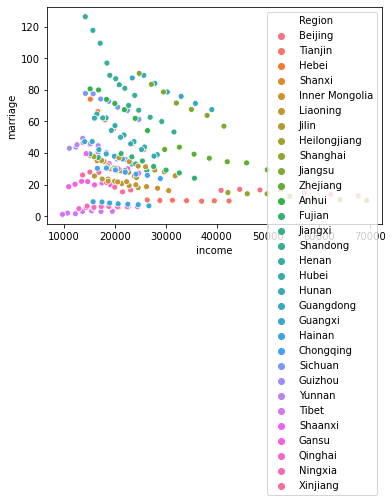

In [49]:
ax_income_marriage = sns.scatterplot(data=merged_df, x='income',y='marriage',hue='Region')

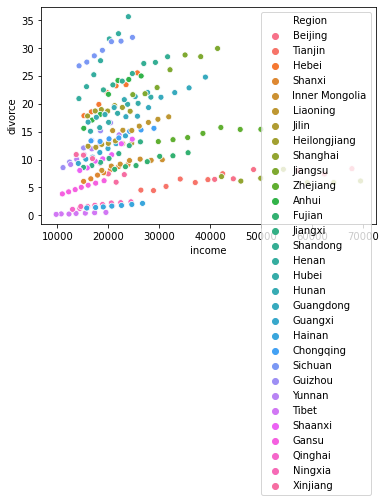

In [52]:
ax_income_divorce = sns.scatterplot(data=merged_df, x='income',y='divorce',hue='Region')

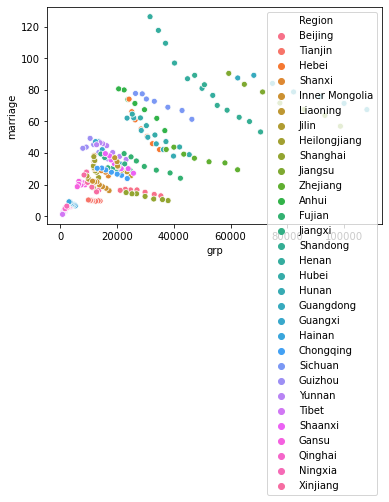

In [53]:
ax_grp_marriage = sns.scatterplot(data=merged_df, x='grp',y='marriage',hue='Region')

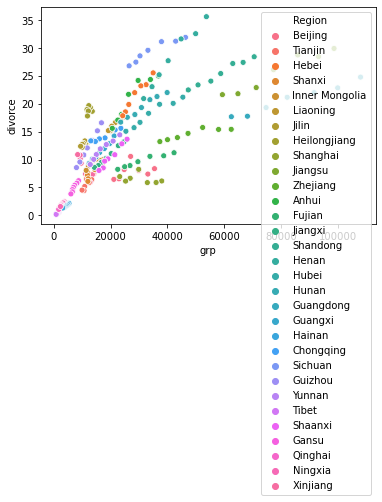

In [54]:
ax_grp_divorce = sns.scatterplot(data=merged_df, x='grp',y='divorce',hue='Region')

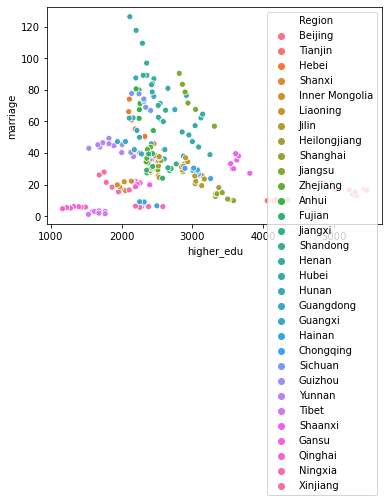

In [56]:
ax_higheredu_marriage = sns.scatterplot(data=merged_df, x='higher_edu',y='marriage',hue='Region')

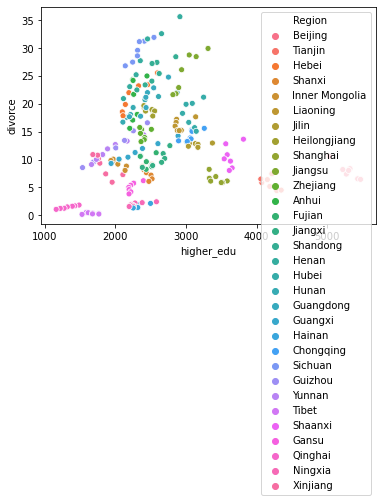

In [55]:
ax_higheredu_divorce = sns.scatterplot(data=merged_df, x='higher_edu',y='divorce',hue='Region')

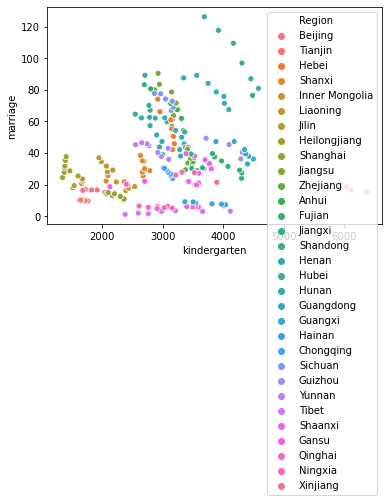

In [57]:
ax_kindergarten_marriage = sns.scatterplot(data=merged_df, x='kindergarten',y='marriage',hue='Region')

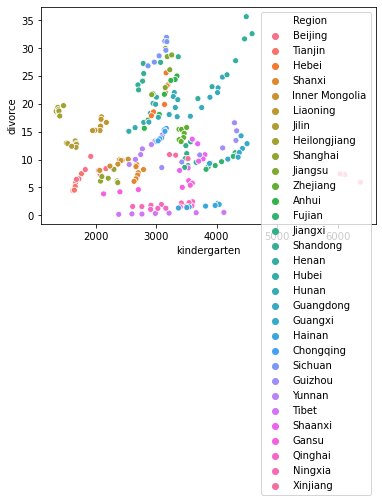

In [58]:
ax_kindergarten_divorce = sns.scatterplot(data=merged_df, x='kindergarten',y='divorce',hue='Region')

In [61]:
merged_df.to_csv('data/merged_data.csv', index=False)